**Standard setup**:
The equation we are interested in  is
\begin{equation}
(\partial_t^2-\partial_x^2 +V(x))\phi=0.
\end{equation}
Defining
$\psi=\partial_t \phi$ we get the first order in time, second order in
space reduced equation:
\begin{equation}
\partial_t \begin{pmatrix} \phi \\ \Psi \end{pmatrix} = \begin{pmatrix} 0 & 1
\\ \partial_x^2-V(x) & 0 \end{pmatrix}\begin{pmatrix} \phi \\ \Psi \end{pmatrix}
\end{equation}
Let $u=(\phi, \Psi)^T$ then we can write the above equation as $\partial_t u = P u$ 
with \begin{equation} P = \begin{pmatrix} 0 & 1
\\ \partial_x^2-V(x) & 0 \end{pmatrix}  \end{equation}
then applying the Fourier transform  (unitary angular frequency definition) we get, the equation $
Pu = i\omega u $
Thus, we are left with the Eigenvalue problem
\begin{equation}
M u = \omega u
\end{equation}
where
\begin{equation}
M= -i P \;\;\;
\end{equation}
In contrast the **hyperboloidal setup** is given in eq (3) of Jaramillo, Panosso-Maceso, Al-Sheik paper

In [ ]:
## Importation of basic rotutine
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import ticker, cm
from scipy import linalg as LA
from math import sin, cos, tanh, cosh, pi, log
import cmath
import import_ipynb

## Importation of Spectral tools
from SpectrumCalculator import *

In [2]:
N = 20
#n=N+1
# Spectral Differentiation, identity and Zero matrices
xt = [D1_CG(N)[0]]
x = np.transpose(xt)
D1 = D1_CG(N)[1]
D2 = D2_CG(N)[1]
Id = np.eye(N+1)
Id_total = np.eye(2*(N+1))
Zero = np.zeros((N+1,N+1))

In [3]:
# Potential
Vminf=-1.0
Vpinf=1.0
a=1.0
Vtanh = 0.5*(Vminf+Vpinf)+ 0.5*(Vpinf - Vminf)*np.tanh(x/a)
# The above potential has exactly solvable QNS as discussed 
# in Petarpa Boonsern and Matt Viser's paper Quasi-normal frequencies: key analytic results
# Let's test a known example in the standard setup: Posch-Teller 
V0=5.0
Vpt= V0*(1.0/np.cosh(x))**2

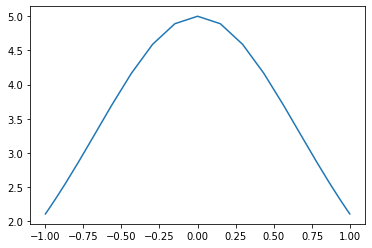

In [4]:
plt.plot(x,Vpt)

In [5]:
# Quick sanity checks:
# Checking Spectrum function with know examples.
TestMatrix=Diagonal_Random_Matrix(n)
TestMatrix;

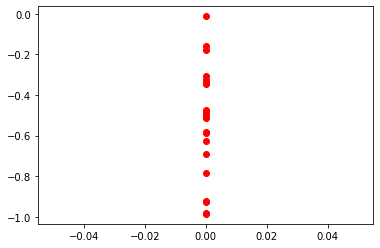

In [6]:
Spectrum(TestMatrix)
plt.plot(Spectrum(-1j*TestMatrix).real, Spectrum(-1j*TestMatrix).imag,'ro')

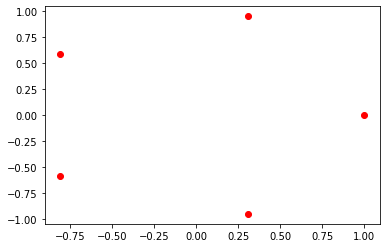

In [9]:
 CirculantMatrix= np.array([[0,1,0,0,0], [0,0,1,0,0] ,[0,0,0,1,0] ,[0,0,0,0,1] ,[1,0,0,0,0]] )
# Example taken from Pseudospectra_lectures_EmbreeCarden.pdf 
plt.plot(Spectrum(CirculantMatrix).real, Spectrum(CirculantMatrix).imag,'ro')

In [10]:
#Testing code with Standard setup
# as described above with posch-teller potential
Pcorner=D2-Vpt*Id

In [12]:
Ptop=np.concatenate((Zero,Id),axis=1)
Pbottom=np.concatenate((Pcorner,Zero),axis=1)
P=np.concatenate((Ptop,Pbottom),axis=0)
M=-1j*P

In [13]:
Spectrum(M);

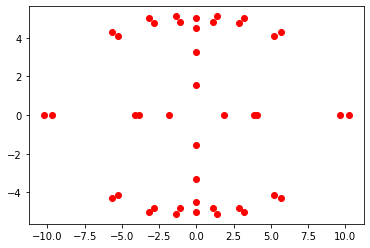

In [14]:
plt.plot(Spectrum(M).real, Spectrum(M).imag,'ro')

In [ ]:
#doesn't work. Confused.

In [15]:
# Checking spectrum with the hyperboloidal setup

In [17]:
# Elementary Operators Version 2
alpha, beta, gamma = 0., 0., 1.
print("alpha =", alpha, ", beta =", beta, ", gamma =", gamma)
V = alpha + beta*x + gamma*(1-x**2) 
L1 = (1-x**2)*((1-x**2)*D2 - 2*x*D1) - V*Id 
L2 = (1-x**2)*(-2*x*D1 - Id)
#EG: why don't we divide all by (1-x**2) for posch-teller?
Bu = np.concatenate((Id,Zero), axis=1)
Bd = np.concatenate((Zero,(1-x**2)*Id), axis=1)
B = np.concatenate((Bu,Bd), axis=0)
# EG: why is B chosen like this?
#print("B", B)
    
# Operator matrix
#L = [Zero, Id]
Lu = np.concatenate((Zero,Id), axis=1)
Ld = np.concatenate((L1,L2), axis=1)
L = np.concatenate((Lu,Ld), axis=0)
    #L += epsilon3*V_random_total

    #print(L1)
    #print(L2)
    
     
L = -1j*L

alpha = 0.0 , beta = 0.0 , gamma = 1.0


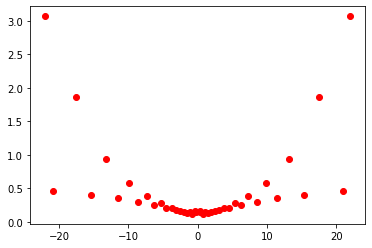

In [18]:
Spectrum(L);
plt.plot(Spectrum(L).real, Spectrum(L).imag,'ro')

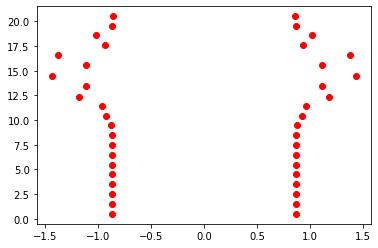

In [19]:
SpectrumAlt(L,B);
plt.plot(SpectrumAlt(L,B).real, SpectrumAlt(L,B).imag,'ro')
# Ok so B seems to fix things. Why is B introduced? Why is the generalised eigenvalue problem needed?